# Multiple Linear Regression:

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset.shape

(50, 5)

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
import matplotlib.pylab as plt

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

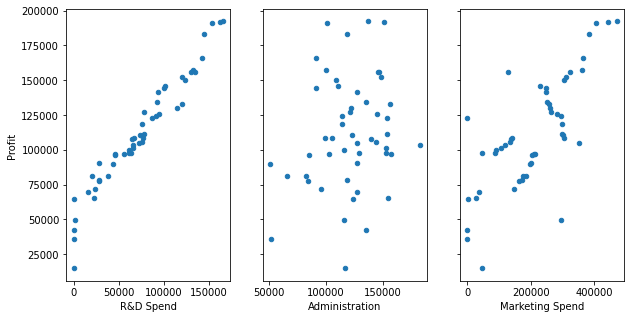

In [8]:
fig, axs =plt.subplots(1,3,sharey=True)

dataset.plot(kind='scatter',x='R&D Spend',y='Profit',ax=axs[0], figsize=(10,5))

dataset.plot(kind='scatter',x='Administration',y='Profit',ax=axs[1])

dataset.plot(kind='scatter',x='Marketing Spend',y='Profit',ax=axs[2])

### One Hot Encoading:


In [9]:
dataset1=pd.get_dummies(dataset,columns=['State'],drop_first=True)

In [10]:
dataset1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


i.e.:

NewYork    : 0 1

California : 0 0

Florida    : 1 0

In [11]:
dataset1.head(3)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0


In [12]:
X = dataset1.drop('Profit',axis=1)

In [13]:
X.head(3)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0


In [14]:
y = dataset1.Profit 
#or # y = dataset['Profit']

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

In [16]:
X.shape , X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50, 5), (35, 5), (35,), (15, 5), (15,))

# Model:

In [17]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

### y = b0 +  b1*X1 +  b2*X2 +  b3*X3 +  b4*X4 +  b5*X15
X1:R&D,  X2: Admin, X3: Market, X4: State_Florida, X5: State_ NY

In [18]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [19]:
lr.intercept_

lr.coef_

array([7.90840255e-01, 3.01968165e-02, 3.10148566e-02, 4.63028992e+02,
       3.04799573e+02])

In [20]:
lr.predict([[175698, 138954, 491568, 0, 1]])

array([201099.60102352])

In [21]:
y_pred= lr.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9358680970046241

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test,y_pred))

7867.855133541396

## Save Model:

In [27]:
import pickle
# open a file, where you ant to store the data
file = open('lr.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)

In [28]:
model = pickle.load(open('lr.pkl', 'rb'))